# Topic 2 : Models


## Section 1 : Absolute Value Functions

### Part 1: Use NumPy and Matplotlib to Plot the Absolute Value Function

#### Overview of Absolute Value Functions

An absolute value refers to how far a number is from the origin (0 on the number line). An absolute value is always positive, and can be used to measure both positive and negative numbers. For example, the distance of both 5 and -5 from 0 is 5, hence 5 is the absolute value for both. Absolute values are represented by the modulus symbol,  "||", with the values between it. For example, the absolute value of 5 is represented as |5|.

An absolute value function is a function that contains of a variable within absolute value bars; it is commonly used to measure the distance between points. It is considered a piecewise function, i.e. consisting of two linear functions, and creates a right angle at the origin.

The general form of the absolute value function is $f(x) = a |x - h| + k$, where a represents how far the graph stretches vertically, while h and k represents how far the funtion shifts horizontally and vertically. The most commonly used form of the function is $f(x) = |x|$, where a = 1 and k = h = 0. 

The code in this notebook uses NumPy and Matplotlib to plot both forms of the absolute value function.

#### Absolute Value :  Basic Form

The below code plots the absolute values of both 25 and -25. When a value is negative, the plot will open up below the origin and when it is positive, it will open above it.

In [1]:
## import libraries
import matplotlib.pyplot as plt
import numpy as np

The pos_neg() function will plot both absolute value functions for both the positive and negative form of a given integer(n).

The numpy abs() method is use to get the absolute value of the integer. Note that this value is converted to a negative to plot the absolute value function for the negative integer; this is so the function will open below 0 on the x axis.

In [4]:
def pos_neg(n):

        # Labels for plots
        label1 ="f(x) = |{}|".format(str(n))
        label2 = "f(x) = |-{}|".format(str(n))

        #Plot negative abs value function first - range -n to n + 1
        x = np.arange(-n, n+1)
        fig,ax = plt.subplots(figsize = (12,6))

        #Make absolute value negative again - so graph opens under origin
        y = -(np.abs(x))
        ax.plot(x, y, label = label2)


        y = (np.abs(x))

        # Move origin into centre - make right angles easer to see
        ax.spines['left'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.plot(x, y, label = label1)
        ax.set_title("Positive and Negative Value Functions for Integer {}".format(n))
        plt.legend()
        plt.show() 
        plt.close()

Below, the absolute values for 25 and -25 are plotted using this function.

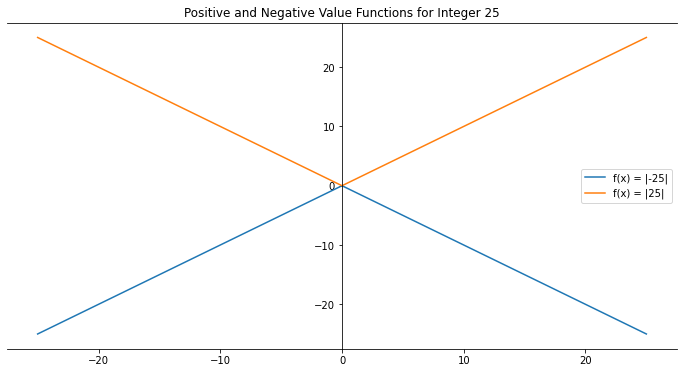

In [5]:
pos_neg(25)

#### Absolute Value : General Form

The below function generates an absolute value plot for a given function. It takes 5 parameters:
- n : Corresponds to x in the general form of the absolute value function
- h : Horizontal shift for plot
- k : Vertical shift for plot
- a : Vertical stretch, how far the plot stretches upwards.

In [6]:
def plot_abs_value(n, h, k, a, pos = True):
    #Generate x values ranging from - x to x
    x = np.arange(-n, n+1)

    #If pos is set to true, plot should open above origin
    if pos == True:
        y = a * (abs(x - h) + k)
    else:
        y = -a * (abs(x - h) + k)
    
    return x,y

Next, this method is called to plot the following absolut value functions:
- $f(x) = 3|2 - 0| + 0$
- $f(x) = 1|2 - 0| + 0$

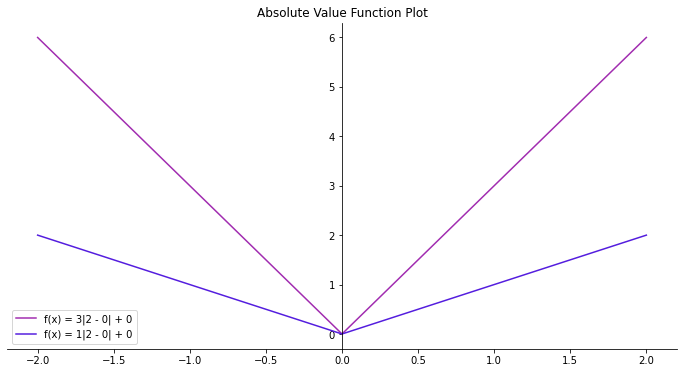

In [16]:
x, y = plot_abs_value(2, 0, 0, 3, pos = True)
x2,y2 = plot_abs_value(2, 0, 0, 1, pos = True)

fig, ax = plt.subplots(figsize = (12,6))
line1 = ax.plot(x,y, label = "f(x) = 3|2 - 0| + 0", color = "#a12cb0")
line2 = ax.plot(x2,y2, label = "f(x) = 1|2 - 0| + 0", color = "#541dde")

ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_title("Absolute Value Function Plot")
ax.legend()
plt.show()

### Issues with Using Absolute Values to Fit Data

When modelling the relationship between two variables, a common method is to find a line that is closest to the datapoints, i.e. minimizes the difference between itself and the observed data. 

If we used absolute values to find this difference, the steps would be as follows:
- Get the predicted line equation ($Y = b_0 + b_1X_i$)
- Get the coordinates of each observed data point ($ X_i,Y_i$)
- Get the error for each coordinate, i.e. the distance from the point to the line ($Y_i - (b_0 + b_1X_i) = Y_i - b_0  - b_1X$)
- Take the sum of these distances for all datapoints. The line with the lowest overall value best describes the relationship between our two variables.

Generally, when dealing with distances between data points and lines, some will be above the line and others will be below,as seen in the below plot. This means that we will have both positive and negative error values for our data points.

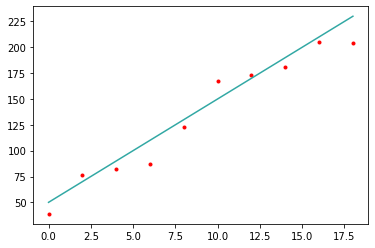

In [18]:
n = np.arange(0.0,20,2)
d = 50 + (n * 10) + np.random.normal(0,10,n.size)
y = 50 + (n * 10)
plt.plot(n,d, "r.")
plt.plot(n,y, color = "#32a8a4")
plt.show()

Positive and negative values may cancel each other out when added together, which will not give us an accurate representation of the total error. If we used absolute values to represent the distance between the line and datapoints, this would resolve this issue; as mentioned in the previous section, absolute values are always positive.

However, absolute values are generally not used to fit data to straight lines due to the mathematical difficulties caused by working with them. When using absolute values to calculate the best fit, our formula looks like the below, and returns an overall error value for the line.

$\sum_{i=1}^n|Y_i - b_0 - b_1X_i|$

We need to find the line that minimizes the formula, i.e. returns the smallest possible error value. Caclulus can be used to maximise or minimuze a formula, with a process called differentiation. Differentiation is a proces of finding the derivative, or rate of change of a function, based on one of its variables. The derivative gives us the slope of the line tangent to the function, i.e. touching the curve at a given point on the graph. This can then be used to find the equation of the tangent line.

Minimizing a formula using differentiation involves taking the first derivative and setting it to 0. As mentioned above, the derivative is the slope of the tangent line. The slope, or limit, exists and is a unique value if there is only one tangent line. However, in the case of absolute value functions, there is no one tangent at 0. In the previous section where absolute values were plotted, the function touches the x axis twice. Hence, absolute values are not differentiable at 0 and we cannot minimize the formula using the method described above. If we were to use absolute values to minimize the formula, we would need to draw and measure regression lines for each data point and sum values, which is not feasible. Therefore, another method of making all the error values positive is required.